#<font color='red'>**TECH CHALLENGE FASE 2 - MACHINE LEARNING AND TIME SERIES**</font>

#<font color='blue'> **ANÁLISE EXPLORATÓRIA DOS DADOS(EDA)**</font>

### Leitura & carregamento dos Dados


In [648]:
#Import de primeiras libs/Carregamento do arquivo/ criação do Dataframe Original
import pandas as pd
import numpy as np
df_ibovespa = pd.read_csv('Dados Históricos - Ibovespa_2anos.csv')

### Análise exploratória dos dados & ETL básicos


In [649]:
#Visualizando as primeiras linhas do df
df_ibovespa.head(10)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,26.07.2024,127.492,125.964,127.700,125.953,"8,27M","1,22%"
1,25.07.2024,125.954,126.423,126.423,125.626,"7,13M","-0,37%"
2,24.07.2024,126.423,126.596,126.823,126.218,"7,30M","-0,13%"
3,23.07.2024,126.590,127.860,127.860,126.530,"7,02M","-0,99%"
4,22.07.2024,127.860,127.616,128.151,127.456,"6,10M","0,19%"
5,19.07.2024,127.616,127.652,128.360,127.413,"7,62M","-0,03%"
6,18.07.2024,127.652,129.450,129.454,127.523,"7,59M","-1,39%"
7,17.07.2024,129.450,129.112,129.658,128.741,"6,67M","0,26%"
8,16.07.2024,129.110,129.322,129.521,128.761,"6,82M","-0,16%"
9,15.07.2024,129.321,128.898,129.485,128.723,"5,83M","0,33%"


In [650]:
#Visualizando as Últimas linhas do df
df_ibovespa.tail(10)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
508,14.07.2022,96.121,97.879,97.879,95.431,"12,58M","-1,80%"
509,13.07.2022,97.881,98.258,98.928,97.403,"12,21M","-0,40%"
510,12.07.2022,98.271,98.212,98.737,97.253,"12,57M","0,06%"
511,11.07.2022,98.212,100.282,100.282,97.854,"8,89M","-2,07%"
512,08.07.2022,100.289,100.732,101.577,99.958,"9,73M","-0,44%"
513,07.07.2022,100.730,98.722,101.420,98.722,"12,70M","2,04%"
514,06.07.2022,98.719,98.294,99.141,97.423,"13,35M","0,43%"
515,05.07.2022,98.295,98.608,98.608,96.499,"13,36M","-0,32%"
516,04.07.2022,98.609,98.952,99.353,98.264,"6,28M","-0,35%"
517,01.07.2022,98.954,98.542,99.340,97.231,"11,61M","0,42%"


In [651]:
#Verificando tipos de dados por coluna
df_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      518 non-null    object 
 1   Último    518 non-null    float64
 2   Abertura  518 non-null    float64
 3   Máxima    518 non-null    float64
 4   Mínima    518 non-null    float64
 5   Vol.      518 non-null    object 
 6   Var%      518 non-null    object 
dtypes: float64(4), object(3)
memory usage: 28.5+ KB


In [652]:
#Analisando tamanho do dataset
df_ibovespa.shape

(518, 7)

In [653]:
#Identificando linhas duplicadas no dataframe
df_ibovespa.duplicated().sum()

0

In [654]:
#Identificando quantidade de valores vazios por coluna
df_ibovespa.isnull().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        0
Var%        0
dtype: int64

In [655]:
#Renomeando colunas
novas_colunas = {'Data' : 'DATA',
                 'Último' : "FECHAMENTO",
                 'Abertura' : 'ABERTURA',
                 'Máxima' : 'MAXIMA',
                 'Mínima' : 'MINIMA',
                 'Vol.' : 'VOLUME_NEGOCIACOES',
                 'Var%' : 'VARIACAO_PERCENTUAL'
}
df_ibovespa = df_ibovespa.rename(columns = novas_colunas)
df_ibovespa.head()

,DATA,FECHAMENTO,ABERTURA,MAXIMA,MINIMA,VOLUME_NEGOCIACOES,VARIACAO_PERCENTUAL
0,26.07.2024,127.492,125.964,127.700,125.953,"8,27M","1,22%"
1,25.07.2024,125.954,126.423,126.423,125.626,"7,13M","-0,37%"
2,24.07.2024,126.423,126.596,126.823,126.218,"7,30M","-0,13%"
3,23.07.2024,126.590,127.860,127.860,126.530,"7,02M","-0,99%"
4,22.07.2024,127.860,127.616,128.151,127.456,"6,10M","0,19%"


In [656]:
#Identificando o index vazio
linha_vazia = df_ibovespa['VOLUME_NEGOCIACOES'].isnull()
indice_vazio = linha_vazia[linha_vazia].index
print(indice_vazio)

# O valor vazio identificado não será removido, mas preenchido com um zero posteriormente e tratado como outlier, visto que  temos informações relevantes na outras colunas e isso não influenciará negativamente o modelo, devido a baixa expressão estatística

Index([], dtype='int64')


In [657]:
#Identificando colunas com valores repetidos
#Está okay que as colunas abaixo tenham valores duplicados, visto que tratam-se de valor numéricos. Haveria preocupação caso a coluna 'DATA' tivesse duplicatas.
duplicated_cols = []
for col in df_ibovespa:
  if df_ibovespa[col].duplicated().any():
    duplicated_cols.append(col)
print(duplicated_cols)

['FECHAMENTO', 'ABERTURA', 'MAXIMA', 'MINIMA', 'VOLUME_NEGOCIACOES', 'VARIACAO_PERCENTUAL']


In [658]:
# Primeiro "ajuste" de casa décimal
df_ibovespa['FECHAMENTO'] = df_ibovespa['FECHAMENTO']*1000
df_ibovespa['ABERTURA'] = df_ibovespa['ABERTURA']*1000
df_ibovespa['MAXIMA'] = df_ibovespa['MAXIMA']*1000
df_ibovespa['MINIMA'] = df_ibovespa['MINIMA']*1000
df_ibovespa.head()

,DATA,FECHAMENTO,ABERTURA,MAXIMA,MINIMA,VOLUME_NEGOCIACOES,VARIACAO_PERCENTUAL
0,26.07.2024,127492.0,125964.0,127700.0,125953.0,"8,27M","1,22%"
1,25.07.2024,125954.0,126423.0,126423.0,125626.0,"7,13M","-0,37%"
2,24.07.2024,126423.0,126596.0,126823.0,126218.0,"7,30M","-0,13%"
3,23.07.2024,126590.0,127860.0,127860.0,126530.0,"7,02M","-0,99%"
4,22.07.2024,127860.0,127616.0,128151.0,127456.0,"6,10M","0,19%"


In [659]:
#Transformando colunas em tipo string para verificar valores vazios e rodar função e remover caracteres indesejados
df_ibovespa['FECHAMENTO'] = df_ibovespa['FECHAMENTO'].astype(str)
df_ibovespa['ABERTURA'] = df_ibovespa['ABERTURA'].astype(str)
df_ibovespa['MAXIMA'] = df_ibovespa['MAXIMA'].astype(str)
df_ibovespa['MINIMA'] = df_ibovespa['MINIMA'].astype(str)
df_ibovespa['VOLUME_NEGOCIACOES'] = df_ibovespa['VOLUME_NEGOCIACOES'].astype(str)
df_ibovespa['VARIACAO_PERCENTUAL'] = df_ibovespa['VARIACAO_PERCENTUAL'].astype(str)

In [660]:
#Criação da função para remover caracteres indesejados das colunas
def remover_caracteres(texto):
    caracteres_especiais = "% M k"
    for char in caracteres_especiais:
        texto = texto.replace(char, '')
    return texto

In [661]:
#Aplicando a função nas colunas
df_ibovespa['FECHAMENTO'] = df_ibovespa['FECHAMENTO'].apply(lambda x: remover_caracteres(x))
df_ibovespa['ABERTURA'] = df_ibovespa['ABERTURA'].apply(lambda x: remover_caracteres(x))
df_ibovespa['MAXIMA'] = df_ibovespa['MAXIMA'].apply(lambda x: remover_caracteres(x))
df_ibovespa['MINIMA'] = df_ibovespa['MINIMA'].apply(lambda x: remover_caracteres(x))
df_ibovespa['VOLUME_NEGOCIACOES'] = df_ibovespa['VOLUME_NEGOCIACOES'].apply(lambda x: remover_caracteres(x))
df_ibovespa['VARIACAO_PERCENTUAL'] = df_ibovespa['VARIACAO_PERCENTUAL'].apply(lambda x: remover_caracteres(x))
df_ibovespa.head()

,DATA,FECHAMENTO,ABERTURA,MAXIMA,MINIMA,VOLUME_NEGOCIACOES,VARIACAO_PERCENTUAL
0,26.07.2024,127492.0,125964.0,127700.0,125953.0,"8,27","1,22"
1,25.07.2024,125954.0,126423.0,126423.0,125626.0,"7,13","-0,37"
2,24.07.2024,126423.0,126596.0,126823.0,126218.0,"7,30","-0,13"
3,23.07.2024,126590.0,127860.0,127860.0,126530.0,"7,02","-0,99"
4,22.07.2024,127860.0,127616.0,128151.00000000001,127456.0,"6,10","0,19"


In [662]:
#Substituindo pontos por barras na coluna de data e vírgula por pontos nas colunas VOLUME_NEGOCIACOES e VARIACAO_PERCENTUAL
#Essa mudança está sendo feita para que as colunas fiquem no padrão do pandas de acordo com o tipo de coluna
df_ibovespa['DATA'] = df_ibovespa['DATA'].str.replace('.','/')
df_ibovespa['VOLUME_NEGOCIACOES'] = df_ibovespa['VOLUME_NEGOCIACOES'].str.replace(',','.')
df_ibovespa['VARIACAO_PERCENTUAL'] = df_ibovespa['VARIACAO_PERCENTUAL'].str.replace(',','.')
df_ibovespa.head()

,DATA,FECHAMENTO,ABERTURA,MAXIMA,MINIMA,VOLUME_NEGOCIACOES,VARIACAO_PERCENTUAL
0,26/07/2024,127492.0,125964.0,127700.0,125953.0,8.27,1.22
1,25/07/2024,125954.0,126423.0,126423.0,125626.0,7.13,-0.37
2,24/07/2024,126423.0,126596.0,126823.0,126218.0,7.30,-0.13
3,23/07/2024,126590.0,127860.0,127860.0,126530.0,7.02,-0.99
4,22/07/2024,127860.0,127616.0,128151.00000000001,127456.0,6.10,0.19


In [663]:
#Removendo letras e qualquer outro caractere da coluna VOLUME_NEGOCIACOES
df_ibovespa['VOLUME_NEGOCIACOES'] = df_ibovespa['VOLUME_NEGOCIACOES'].str.replace(r'[^\d.]', '', regex=True)

In [664]:
#Mudando o tipo da coluna de data para datetime
import datetime as datetime
df_ibovespa['DATA'] = pd.to_datetime(df_ibovespa['DATA'], format ='%d/%m/%Y')
df_ibovespa['FECHAMENTO'] = df_ibovespa['FECHAMENTO'].astype(float)
df_ibovespa['ABERTURA'] = df_ibovespa['ABERTURA'].astype(float)
df_ibovespa['MAXIMA'] = df_ibovespa['MAXIMA'].astype(float)
df_ibovespa['MINIMA'] = df_ibovespa['MINIMA'].astype(float)
df_ibovespa['VOLUME_NEGOCIACOES'] = pd.to_numeric(df_ibovespa['VOLUME_NEGOCIACOES'], errors='coerce')
df_ibovespa['VARIACAO_PERCENTUAL'] = df_ibovespa['VARIACAO_PERCENTUAL'].astype(float)
df_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATA                 518 non-null    datetime64[ns]
 1   FECHAMENTO           518 non-null    float64       
 2   ABERTURA             518 non-null    float64       
 3   MAXIMA               518 non-null    float64       
 4   MINIMA               518 non-null    float64       
 5   VOLUME_NEGOCIACOES   518 non-null    float64       
 6   VARIACAO_PERCENTUAL  518 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 28.5 KB


In [665]:
#Transformando colunas em tipo int, para que os dados presentes nas colunas possam ser usados em visualizações etc...
df_ibovespa['FECHAMENTO'] = df_ibovespa['FECHAMENTO'].astype(int)
df_ibovespa['ABERTURA'] = df_ibovespa['ABERTURA'].astype(int)
df_ibovespa['MAXIMA'] = df_ibovespa['MAXIMA'].astype(int)
df_ibovespa['MINIMA'] = df_ibovespa['MINIMA'].astype(int)
df_ibovespa.dtypes

DATA                   datetime64[ns]
FECHAMENTO                      int64
ABERTURA                        int64
MAXIMA                          int64
MINIMA                          int64
VOLUME_NEGOCIACOES            float64
VARIACAO_PERCENTUAL           float64
dtype: object

In [666]:
#Tratando valor vazio na coluna VOLUME_NEGOCIACOES e convertendo os valores para milhões
df_ibovespa["VOLUME_NEGOCIACOES"] = df_ibovespa["VOLUME_NEGOCIACOES"] * 1_000_000
df_ibovespa["VOLUME_NEGOCIACOES"] = df_ibovespa["VOLUME_NEGOCIACOES"].replace([np.nan, np.inf, -np.inf], 0)
df_ibovespa["VOLUME_NEGOCIACOES"] = df_ibovespa["VOLUME_NEGOCIACOES"].astype(int)
df_ibovespa.head()

,DATA,FECHAMENTO,ABERTURA,MAXIMA,MINIMA,VOLUME_NEGOCIACOES,VARIACAO_PERCENTUAL
0,2024-07-26,127492,125964,127700,125953,8270000,1.22
1,2024-07-25,125954,126423,126423,125626,7130000,-0.37
2,2024-07-24,126423,126596,126823,126218,7300000,-0.13
3,2024-07-23,126590,127860,127860,126530,7020000,-0.99
4,2024-07-22,127860,127616,128151,127456,6100000,0.19


In [667]:
#Organizando o dataframe pela data de forma decrescente
df_ibovespa = df_ibovespa.sort_values(by='DATA', ascending=False)
df_ibovespa.head()

,DATA,FECHAMENTO,ABERTURA,MAXIMA,MINIMA,VOLUME_NEGOCIACOES,VARIACAO_PERCENTUAL
0,2024-07-26,127492,125964,127700,125953,8270000,1.22
1,2024-07-25,125954,126423,126423,125626,7130000,-0.37
2,2024-07-24,126423,126596,126823,126218,7300000,-0.13
3,2024-07-23,126590,127860,127860,126530,7020000,-0.99
4,2024-07-22,127860,127616,128151,127456,6100000,0.19


In [668]:
#Resetando o index
df_ibovespa = df_ibovespa.reset_index(drop=True)
df_ibovespa.head()

,DATA,FECHAMENTO,ABERTURA,MAXIMA,MINIMA,VOLUME_NEGOCIACOES,VARIACAO_PERCENTUAL
0,2024-07-26,127492,125964,127700,125953,8270000,1.22
1,2024-07-25,125954,126423,126423,125626,7130000,-0.37
2,2024-07-24,126423,126596,126823,126218,7300000,-0.13
3,2024-07-23,126590,127860,127860,126530,7020000,-0.99
4,2024-07-22,127860,127616,128151,127456,6100000,0.19


In [669]:
#Conferindo ajustes e validando que não há mais linhas vazias
df_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATA                 518 non-null    datetime64[ns]
 1   FECHAMENTO           518 non-null    int64         
 2   ABERTURA             518 non-null    int64         
 3   MAXIMA               518 non-null    int64         
 4   MINIMA               518 non-null    int64         
 5   VOLUME_NEGOCIACOES   518 non-null    int64         
 6   VARIACAO_PERCENTUAL  518 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 28.5 KB


### Análise descritiva dos dados

In [670]:
#Estatísticas descritivas do df
df_ibovespa.describe()

,DATA,FECHAMENTO,ABERTURA,MAXIMA,MINIMA,VOLUME_NEGOCIACOES,VARIACAO_PERCENTUAL
count,518,518.000000,518.000000,518.000000,518.000000,5.180000e+02,518.000000
mean,2023-07-14 04:51:53.513513728,116493.895753,116438.305019,117340.793436,115597.928571,1.186490e+07,0.055734
min,2022-07-01 00:00:00,96121.000000,96119.000000,96971.000000,95267.000000,4.330000e+06,-3.350000
25%,2023-01-05 06:00:00,109542.250000,109475.250000,110413.000000,108493.750000,9.602500e+06,-0.607500
50%,2023-07-13 12:00:00,116200.500000,116165.500000,117295.500000,115615.500000,1.150000e+07,0.065000
75%,2024-01-21 06:00:00,125713.750000,125662.000000,126552.500000,125270.750000,1.360750e+07,0.710000
max,2024-07-26 00:00:00,134194.000000,134194.000000,134392.000000,133832.000000,2.603000e+07,5.540000
std,NaN,9265.693766,9286.403361,9152.676738,9388.924072,3.204725e+06,1.104248


# <font color='blue'>**VISUALIZAÇÕES INICIAIS**</font>
-------------

In [671]:
#Importando as bibliotecas de visualização
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns

In [672]:
#Criando uma cópia do df original para adicionar colunas de suporte para visualizações iniciais
df_ibovespa_viz = df_ibovespa.copy()
df_ibovespa_viz.head()

,DATA,FECHAMENTO,ABERTURA,MAXIMA,MINIMA,VOLUME_NEGOCIACOES,VARIACAO_PERCENTUAL
0,2024-07-26,127492,125964,127700,125953,8270000,1.22
1,2024-07-25,125954,126423,126423,125626,7130000,-0.37
2,2024-07-24,126423,126596,126823,126218,7300000,-0.13
3,2024-07-23,126590,127860,127860,126530,7020000,-0.99
4,2024-07-22,127860,127616,128151,127456,6100000,0.19


In [673]:
#Criando coluna de mes e ano
df_ibovespa_viz['MES_ANO'] = pd.to_datetime(df_ibovespa_viz['DATA']).dt.to_period('M')
df_ibovespa_viz['ANO'] = pd.to_datetime(df_ibovespa_viz['DATA']).dt.to_period('Y')

#Convertendo coluna de mes e ano para Timestamp
df_ibovespa_viz['MES_ANO'] = df_ibovespa_viz['MES_ANO'].dt.to_timestamp()
df_ibovespa_viz['ANO'] = df_ibovespa_viz['ANO'].dt.to_timestamp()
df_ibovespa_viz.head()

,DATA,FECHAMENTO,ABERTURA,MAXIMA,MINIMA,VOLUME_NEGOCIACOES,VARIACAO_PERCENTUAL,MES_ANO,ANO
0,2024-07-26,127492,125964,127700,125953,8270000,1.22,2024-07-01,2024-01-01
1,2024-07-25,125954,126423,126423,125626,7130000,-0.37,2024-07-01,2024-01-01
2,2024-07-24,126423,126596,126823,126218,7300000,-0.13,2024-07-01,2024-01-01
3,2024-07-23,126590,127860,127860,126530,7020000,-0.99,2024-07-01,2024-01-01
4,2024-07-22,127860,127616,128151,127456,6100000,0.19,2024-07-01,2024-01-01


In [674]:
df_ibovespa_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATA                 518 non-null    datetime64[ns]
 1   FECHAMENTO           518 non-null    int64         
 2   ABERTURA             518 non-null    int64         
 3   MAXIMA               518 non-null    int64         
 4   MINIMA               518 non-null    int64         
 5   VOLUME_NEGOCIACOES   518 non-null    int64         
 6   VARIACAO_PERCENTUAL  518 non-null    float64       
 7   MES_ANO              518 non-null    datetime64[ns]
 8   ANO                  518 non-null    datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(5)
memory usage: 36.5 KB


Análise de correlação de Pearson



- ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
- ρ = 0,7 a 0,9 (positivo ou negativo): correlação forte;
- ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
- ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
- ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

<Axes: >

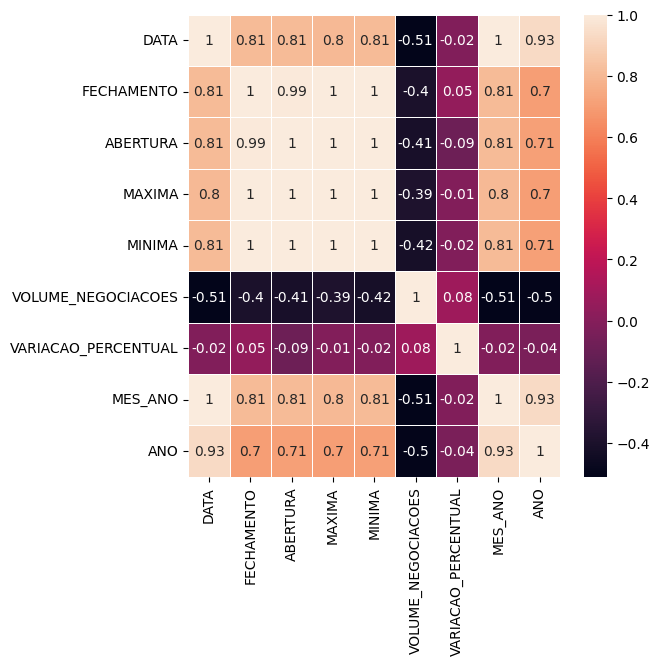

In [675]:
correlation_matrix = df_ibovespa_viz.corr().round(2)

fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

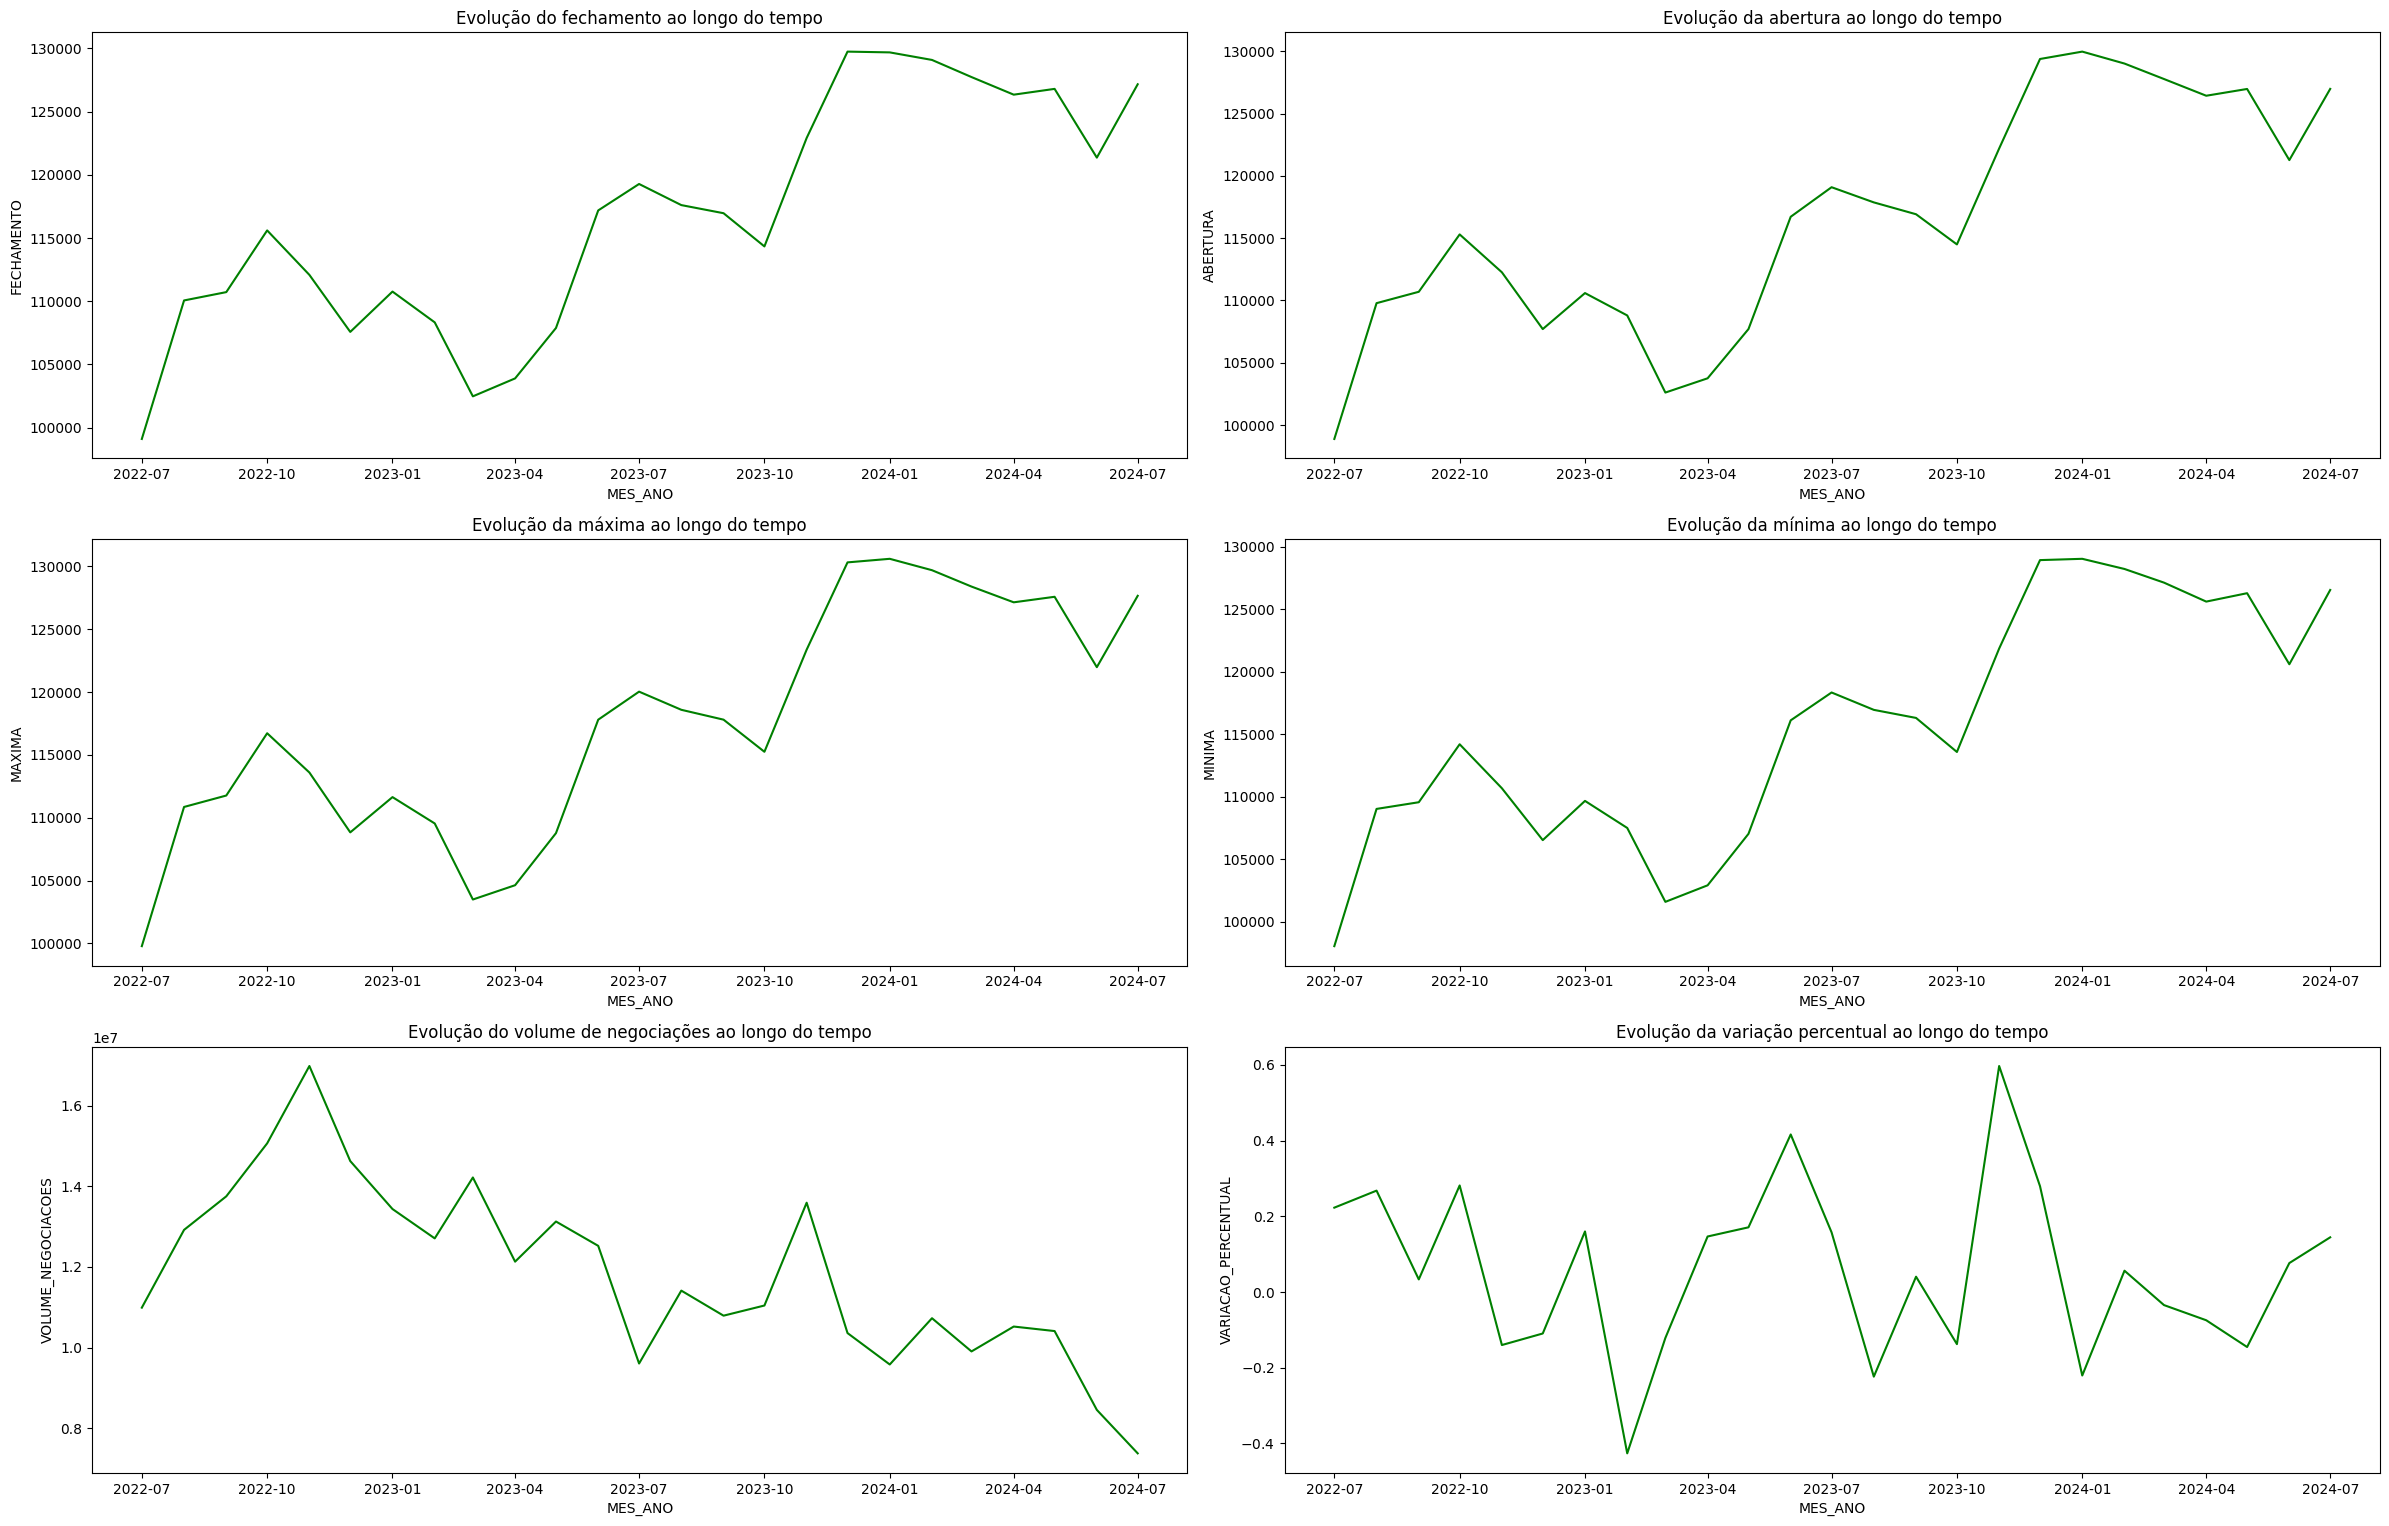

In [676]:
#Plot de gráfico de linhas para acompanhar a evolução do fechamento ao longo do tempo

plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
sns.lineplot(x=df_ibovespa_viz['MES_ANO'], y=df_ibovespa_viz['FECHAMENTO'], data=df_ibovespa_viz, color='green', errorbar=None)
plt.xlabel('MES_ANO')
plt.ylabel('FECHAMENTO')
plt.title('Evolução do fechamento ao longo do tempo')

plt.subplot(4, 2, 2)
sns.lineplot(x=df_ibovespa_viz['MES_ANO'], y=df_ibovespa_viz['ABERTURA'], data=df_ibovespa_viz, color='green', errorbar=None)
plt.xlabel('MES_ANO')
plt.ylabel('ABERTURA')
plt.title('Evolução da abertura ao longo do tempo')

plt.subplot(4, 2, 3)
sns.lineplot(x=df_ibovespa_viz['MES_ANO'], y=df_ibovespa_viz['MAXIMA'], data=df_ibovespa_viz, color='green', errorbar=None)
plt.xlabel('MES_ANO')
plt.ylabel('MAXIMA')
plt.title('Evolução da máxima ao longo do tempo')

plt.subplot(4, 2, 4)
sns.lineplot(x=df_ibovespa_viz['MES_ANO'], y=df_ibovespa_viz['MINIMA'], data=df_ibovespa_viz, color='green', errorbar=None)
plt.xlabel('MES_ANO')
plt.ylabel('MINIMA')
plt.title('Evolução da mínima ao longo do tempo')

plt.subplot(4, 2, 5)
sns.lineplot(x=df_ibovespa_viz['MES_ANO'], y=df_ibovespa_viz['VOLUME_NEGOCIACOES'], data=df_ibovespa_viz, color='green', errorbar=None)
plt.xlabel('MES_ANO')
plt.ylabel('VOLUME_NEGOCIACOES')
plt.title('Evolução do volume de negociações ao longo do tempo')

plt.subplot(4, 2, 6)
sns.lineplot(x=df_ibovespa_viz['MES_ANO'], y=df_ibovespa_viz['VARIACAO_PERCENTUAL'], data=df_ibovespa_viz, color='green', errorbar=None)
plt.xlabel('MES_ANO')
plt.ylabel('VARIACAO_PERCENTUAL')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.title('Evolução da variação percentual ao longo do tempo')

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposições
plt.show()

<Figure size 2400x2000 with 0 Axes>

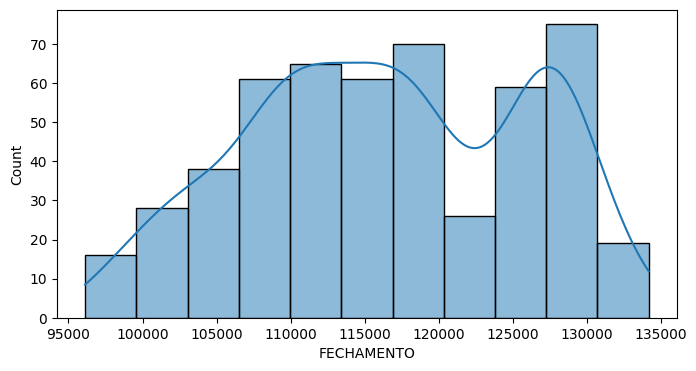

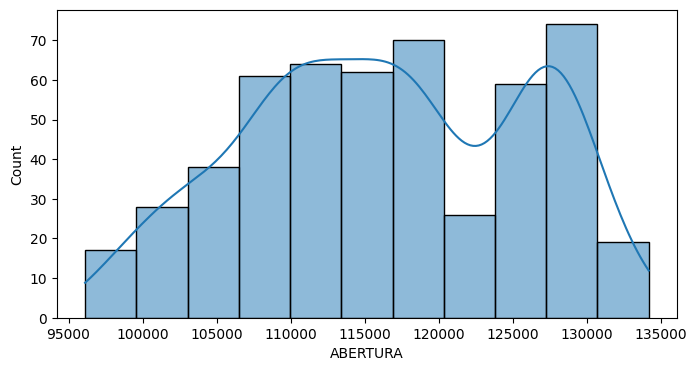

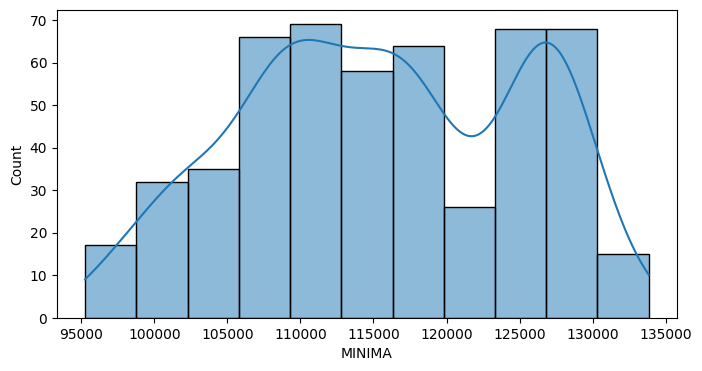

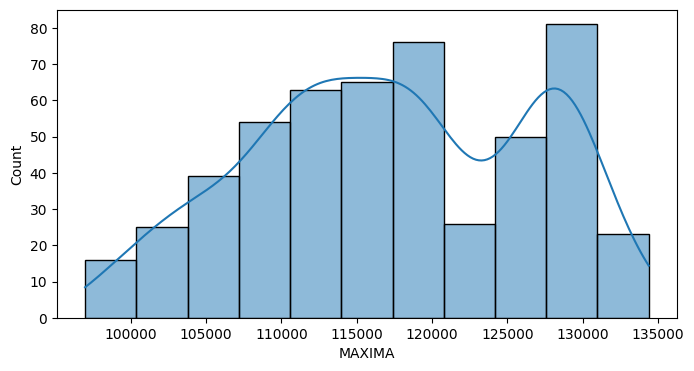

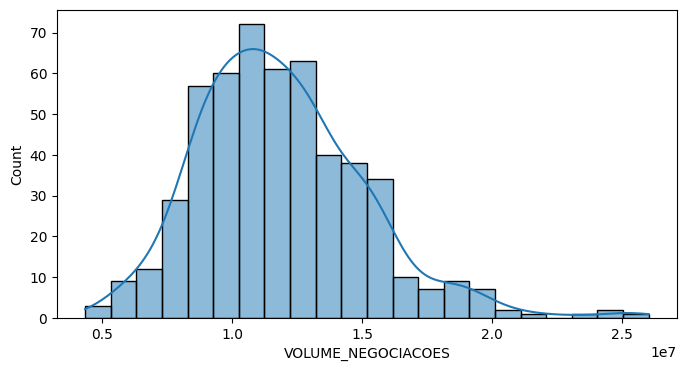

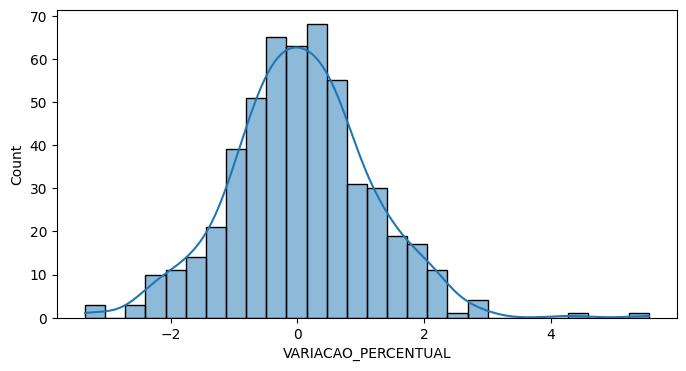

In [677]:
#Gráfico de historiograma

plt.figure(figsize=(24,20))

fig, axes = plt.subplots(figsize=(8,4))
sns.histplot(data=df_ibovespa_viz, x="FECHAMENTO", kde=True)
plt.show()

fig, axes = plt.subplots(figsize=(8,4))
sns.histplot(data=df_ibovespa_viz, x="ABERTURA", kde=True)
plt.show()

fig, axes = plt.subplots(figsize=(8,4))
sns.histplot(data=df_ibovespa_viz, x="MINIMA", kde=True)
plt.show()

fig, axes = plt.subplots(figsize=(8,4))
sns.histplot(data=df_ibovespa_viz, x="MAXIMA", kde=True)
plt.show()

fig, axes = plt.subplots(figsize=(8,4))
sns.histplot(data=df_ibovespa_viz, x="VOLUME_NEGOCIACOES", kde=True)
plt.show()

fig, axes = plt.subplots(figsize=(8,4))
sns.histplot(data=df_ibovespa_viz, x="VARIACAO_PERCENTUAL", kde=True)
plt.show()

#<font color='blue'>**DATAFRAME CONSTRUÍDO APÓS EDA**</font>
------------

In [678]:
df_ibovespa.head()

,DATA,FECHAMENTO,ABERTURA,MAXIMA,MINIMA,VOLUME_NEGOCIACOES,VARIACAO_PERCENTUAL
0,2024-07-26,127492,125964,127700,125953,8270000,1.22
1,2024-07-25,125954,126423,126423,125626,7130000,-0.37
2,2024-07-24,126423,126596,126823,126218,7300000,-0.13
3,2024-07-23,126590,127860,127860,126530,7020000,-0.99
4,2024-07-22,127860,127616,128151,127456,6100000,0.19


#<font color='blue'>**CRIAÇÃO E CONCLUSÃO DOS MODELOS**</font>
--------------

##<font color='green'>**MODELO TESTADO:** ARIMAX</font>
----------

###<font color='red'>**BIBLIOTECAS**</font>

In [679]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

###<font color='red'>**SELECIONANDO O DATAFRAME**</font>

In [680]:
#Eliminando colunas desnecessárias
df_st_sa = df_ibovespa.drop(['MAXIMA', 'MINIMA', 'VOLUME_NEGOCIACOES', 'VARIACAO_PERCENTUAL'], axis=1)
df_st_sa.sort_values(by='DATA', ascending=True, inplace=True)
df_st_sa.head()

,DATA,FECHAMENTO,ABERTURA
517,2022-07-01,98954,98542
516,2022-07-04,98609,98952
515,2022-07-05,98295,98608
514,2022-07-06,98719,98294
513,2022-07-07,100730,98722


###<font color='red'>**SEPARARNDO DADOS DE TREINO E TESTE**</font>

In [681]:
#Dividir a quantidade de corte de teste e treino
len_train_sa = int(len(df_st_sa)*0.94)

#Dividir os dados em treino e teste(94% treino, 6% teste)
df_train_sa = df_st_sa[:len_train_sa]
df_test_sa = df_st_sa[len_train_sa:]

print(f'Tamanho do conjunto de treinamento: {len(df_train_sa)}')
print(f'Tamanho do conjunto de teste: {len(df_test_sa)}')

Tamanho do conjunto de treinamento: 486
Tamanho do conjunto de teste: 32


In [682]:
#Exibir os primeiros registros dos conjunts de treino e teste não escalonados
print('Conjunto de treinamento:')
display(df_train_sa.head())
display(df_train_sa.tail())

print("Conjunto de teste:")
display(df_test_sa.head())
display(df_test_sa.tail())

Conjunto de treinamento:


,DATA,FECHAMENTO,ABERTURA
517,2022-07-01,98954,98542
516,2022-07-04,98609,98952
515,2022-07-05,98295,98608
514,2022-07-06,98719,98294
513,2022-07-07,100730,98722


,DATA,FECHAMENTO,ABERTURA
36,2024-06-06,122899,121408
35,2024-06-07,120767,122899
34,2024-06-10,120760,120769
33,2024-06-11,121635,120760
32,2024-06-12,119936,121644


Conjunto de teste:


,DATA,FECHAMENTO,ABERTURA
31,2024-06-13,119568,119936
30,2024-06-14,119662,119558
29,2024-06-17,119138,119663
28,2024-06-18,119630,119138
27,2024-06-19,120261,119630


,DATA,FECHAMENTO,ABERTURA
4,2024-07-22,127860,127616
3,2024-07-23,126590,127860
2,2024-07-24,126423,126596
1,2024-07-25,125954,126423
0,2024-07-26,127492,125964


### <font color='red'>**MinMaxScaler - NORMALIZANDO OS DADOS**</font>
>Dados de treino e teste escalonados separadamente

In [683]:
#Selecionando as colunas que serão escalonadas
df_st_sa_escalonado = df_st_sa.select_dtypes(include=['int64', 'float64']).columns

In [684]:
# Inicializar o MinMaxScaler
# Normalizar os dados(Deixar todos na mesma escala)
#Selecionando biblioteca
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Ajustar o scaler nos dados de treino
scaler.fit(df_train_sa[df_st_sa_escalonado])

# Transformar os dados de treino
df_train_sa[df_st_sa_escalonado] = scaler.transform(df_train_sa[df_st_sa_escalonado])

# Transformar os dados de teste
df_test_sa[df_st_sa_escalonado] = scaler.transform(df_test_sa[df_st_sa_escalonado])

<ipython-input-684-6241c409a675>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_sa[df_st_sa_escalonado] = scaler.transform(df_train_sa[df_st_sa_escalonado])
<ipython-input-684-6241c409a675>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_sa[df_st_sa_escalonado] = scaler.transform(df_test_sa[df_st_sa_escalonado])


In [685]:
#Exibir os primeiros registros dos conjunts de treino e teste escalonados
print('Conjunto de treinamento:')
display(df_train_sa.head())
display(df_train_sa.tail())

print("Conjunto de teste:")
display(df_test_sa.head())
display(df_test_sa.tail())

Conjunto de treinamento:


,DATA,FECHAMENTO,ABERTURA
517,2022-07-01,0.074410,0.063638
516,2022-07-04,0.065348,0.074406
515,2022-07-05,0.057101,0.065371
514,2022-07-06,0.068237,0.057124
513,2022-07-07,0.121057,0.068365


,DATA,FECHAMENTO,ABERTURA
36,2024-06-06,0.703333,0.664189
35,2024-06-07,0.647335,0.703349
34,2024-06-10,0.647152,0.647406
33,2024-06-11,0.670134,0.647170
32,2024-06-12,0.625509,0.670387


Conjunto de teste:


,DATA,FECHAMENTO,ABERTURA
31,2024-06-13,0.615843,0.625529
30,2024-06-14,0.618312,0.615601
29,2024-06-17,0.604549,0.618359
28,2024-06-18,0.617472,0.604570
27,2024-06-19,0.634045,0.617492


,DATA,FECHAMENTO,ABERTURA
4,2024-07-22,0.833635,0.827236
3,2024-07-23,0.800278,0.833644
2,2024-07-24,0.795892,0.800446
1,2024-07-25,0.783574,0.795903
0,2024-07-26,0.823970,0.783848


###<font color='red'>**PREPARANDO DADOS DE TREINO E TESTE**</font>

In [686]:
#Definindo a serie temporal de treino com o indice de data
s_train_sa = df_train_sa.set_index('DATA')[['FECHAMENTO', 'ABERTURA']]
display('end_data:',s_train_sa.head())
display('start_data:',s_train_sa.tail())
display(len(s_train_sa))

'end_data:'

,FECHAMENTO,ABERTURA
DATA,,
2022-07-01,0.074410,0.063638
2022-07-04,0.065348,0.074406
2022-07-05,0.057101,0.065371
2022-07-06,0.068237,0.057124
2022-07-07,0.121057,0.068365


'start_data:'

,FECHAMENTO,ABERTURA
DATA,,
2024-06-06,0.703333,0.664189
2024-06-07,0.647335,0.703349
2024-06-10,0.647152,0.647406
2024-06-11,0.670134,0.647170
2024-06-12,0.625509,0.670387


486

In [687]:
#Definindo a serie temporal de teste com o indice de data
s_test_sa = df_test_sa.set_index('DATA')[['FECHAMENTO', 'ABERTURA']]
display('end_data:',s_test_sa.head())
display('start_data:',s_test_sa.tail())
display(len(s_test_sa))

'end_data:'

,FECHAMENTO,ABERTURA
DATA,,
2024-06-13,0.615843,0.625529
2024-06-14,0.618312,0.615601
2024-06-17,0.604549,0.618359
2024-06-18,0.617472,0.604570
2024-06-19,0.634045,0.617492


'start_data:'

,FECHAMENTO,ABERTURA
DATA,,
2024-07-22,0.833635,0.827236
2024-07-23,0.800278,0.833644
2024-07-24,0.795892,0.800446
2024-07-25,0.783574,0.795903
2024-07-26,0.823970,0.783848


32

###<font color='red'>**ACF(AUTOCORRELAÇÃO) e PACF(AUTOCORRELAÇÃO PARCIAL)**</font>

>A **Autocorrelação (ACF)** mostra como os valores em diferentes tempos estão correlacionados. É comum observar que a **autocorrelação** é alta para **lags** pequenos e decai à medida que os **lags** aumentam.

>**Número de lags:** Refere-se ao número de períodos pelo qual a série é deslocada. Por exemplo, um **lag** de 3 significa que você está comparando o valor em
𝑡
 com o valor em
t−3.

>Por exemplo no mundo das ações ela mostra como o **preço de hoje** está correlacionado com o **preço de ontem** (lag 1), o preço de dois dias atrás (lag 2), e assim por diante. Uma **ACF** que decai lentamente pode indicar que o preço de uma ação tem uma memória longa, ou seja, o preço de hoje ainda é influenciado por preços de muitos dias atrás.

---------------------------------


>A **Autocorrelação Parcial (PACF)** mede a correlação entre a série temporal em diferentes **lags**, eliminando os efeitos das autocorrelações de **lags** intermediários. Em outras palavras, ela isola a relação direta entre
𝑦
𝑡
y
t
​
  e
𝑦
𝑡
−
𝑘
y
t−k
​
 ), nota-se um decaimento rápido após os primeiros lags.

 >Ela é usada para identificar a ordem da parte autoregressiva(p);
 --------------------------

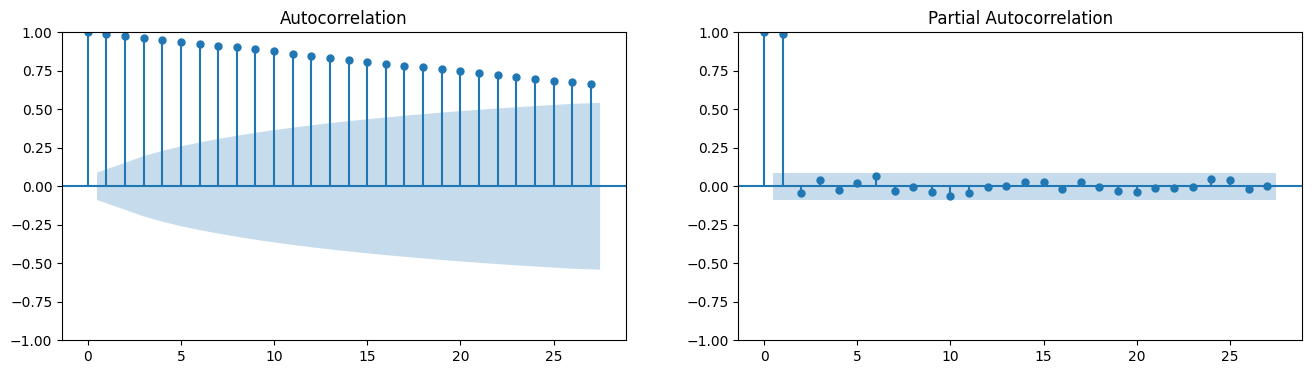

In [688]:
#Plotar ACF e PACF para determinar p e q

#Criando uma figura com 2 subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16,4))

#Plotando a função ACF da série de treino no primeiro subplot(axes=0)
plot_acf(s_train_sa['FECHAMENTO'], ax=axes[0])

#Plotando a função PACF da série de treino no segundo subplot(axes=1)
plot_pacf(s_train_sa['FECHAMENTO'], ax=axes[1])

plt.show()

###<font color='red'>**VALORES p, d e q**</font>


####p, d e q
---------------------

> p: Ordem da parte autoregressiva (quantos lags na PACF apresentam valores significativos), em outras palavras, **p** é o número de **lags** após o qual a **PACF** **corta para zero**. Isso significa que os lags além deste ponto não têm uma correlação significativa.

>d: Ordem da diferenciação (quantas vezes os dados foram diferenciados para torná-los estacionários).

>q: Ordem da média móvel (quantos lags na ACF apresentam valores significativos), em outras palavras, **q** é o número de **lags** após o qual a **ACF** **corta para zero**. Isso significa que os lags além deste ponto não têm uma correlação significativa.
----------

####Verificando a estacionariedade para definir o valor de 'd'

In [689]:
# Selecionar a série temporal
serie_sa = df_st_sa['FECHAMENTO']

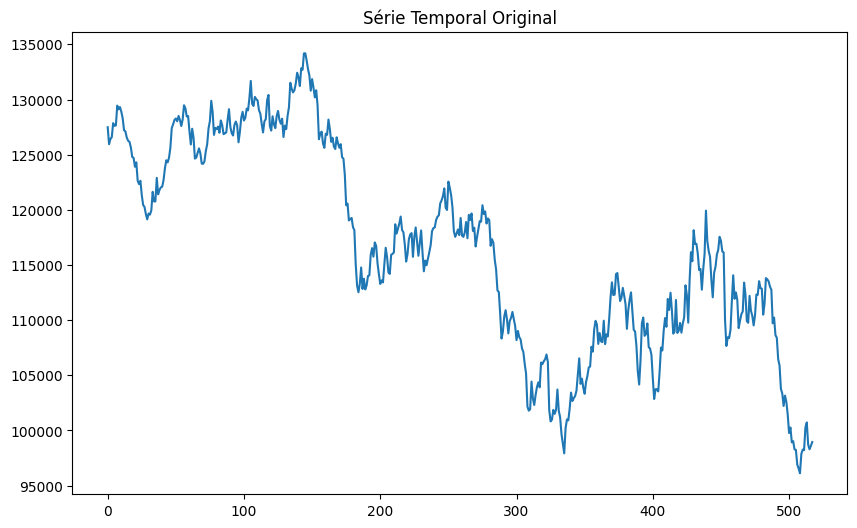

In [690]:
# Plotar a série temporal original
plt.figure(figsize=(10, 6))
plt.plot(serie_sa)
plt.title('Série Temporal Original')
plt.show()

In [691]:
#Importando a biblioteca para verificar a partir de calculos a estacionariedade
from statsmodels.tsa.stattools import adfuller

In [692]:
#Executando o teste ADF
result = adfuller(df_st_sa['FECHAMENTO'])

print('Estatística ADF:', result[0])
print('Valor-p:', result[1])
print('Valores Críticos:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

Estatística ADF: -1.8956307919067308
Valor-p: 0.33411930759695224
Valores Críticos:
   1%: -3.443061925077973
   5%: -2.8671466525252014
   10%: -2.5697561378507907


**Considerações após os cálculos:**

**Hipótese Nula no Teste ADF:**

- A hipótese nula no teste ADF é que a série temporal possui uma raiz unitária, ou seja, a série é não estacionária.

**Interpretação do Valor-p:**

- Quando você realiza o teste ADF, você obtém um valor-p. Se o valor-p for menor do que o nível de significância escolhido (como 0.05), você rejeita a hipótese nula.
- Rejeitar a hipótese nula indica que há evidência suficiente nos dados para concluir que a série temporal não possui raiz unitária, ou seja, é estacionária.

**Conclusão:**

Com base nas análises estatísticas não podemos rejeitar a hipótese nula, ou seja, consideramos esta serie temporal como não estacionária, e para trabalhar com ARIMA, precisamos torna-lá estacionária.


####Aplicando a Diferencição para verificar o valor de 'd' suficiente para tornar a serie temporal estacionária

In [693]:
# Diferenciar a série uma vez
serie_sa_diff1 = serie_sa.diff().dropna()

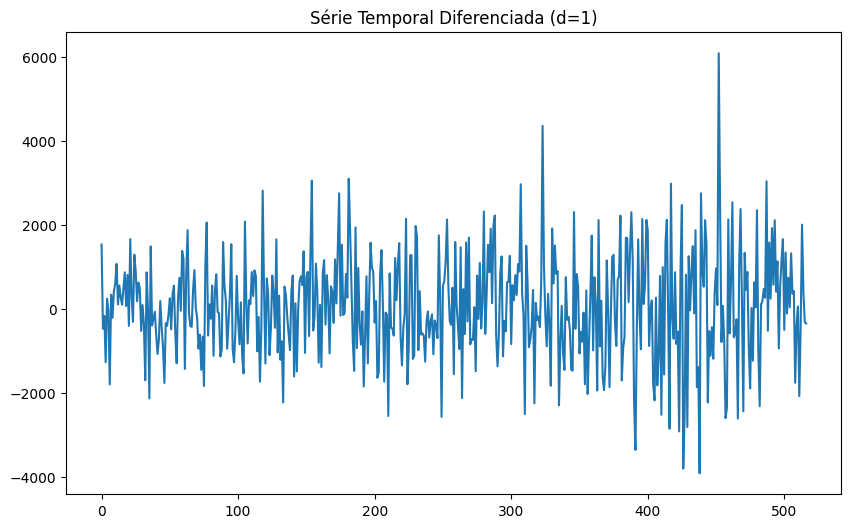

In [694]:
# Plotar a série diferenciada uma vez
plt.figure(figsize=(10, 6))
plt.plot(serie_sa_diff1)
plt.title('Série Temporal Diferenciada (d=1)')
plt.show()

In [695]:
#Executando o teste ADF após a diferenciação
result2 = adfuller(serie_sa_diff1)

print('Estatística ADF:', result2[0])
print('Valor-p:', result2[1])
print('Valores Críticos:')
for key, value in result2[4].items():
    print(f'   {key}: {value}')

Estatística ADF: -16.818992251075752
Valor-p: 1.1824447084402895e-29
Valores Críticos:
   1%: -3.4431115411022146
   5%: -2.8671684899522023
   10%: -2.5697677754736543


>Após a diferenciação d=1, podemos rejeitar a hipótese nula, ou seja, podemos afirmar que agora a série é estacionária

####Definindo os valores de p, d e q após as análises

In [696]:
#Visualmente o corte zero do ACF é no lag 2
p=2

#Após diferenciação 1 a serie temporal se tornou estacionária
d=1

#Visualmente o corte zero do gráfico PACF é no lag 2
q=4

###<font color='red'>**SELECIONANDO E TREINANDO O MODELO**</font>

In [697]:
#Treinando o modelo com os valores de treino
arimax = SARIMAX(s_train_sa['FECHAMENTO'], exog=s_train_sa['ABERTURA'], order=(p, d, q))
arimax_fit = arimax.fit(disp=False)

#Fazendo as previsões com os valores de teste
exog_forecast = s_test_sa['ABERTURA']
previsoes_sa = arimax_fit.predict(start=len(s_train_sa), end=len(s_train_sa)+len(s_test_sa)-1,
                                  exog=exog_forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/stat

In [698]:
# Remover NaNs das previsões e dos dados de teste para garantir a compatibilidade
s_test_sa = s_test_sa.dropna()
previsoes_sa = previsoes_sa[~np.isnan(previsoes_sa)]

In [699]:
# Verificar novamente os tamanhos para garantir que correspondam
print(f'Tamanho de serie_teste: {len(s_test_sa)}')
print(f'Tamanho de previsoes: {len(s_train_sa)}')

Tamanho de serie_teste: 32
Tamanho de previsoes: 486


###<font color='red'>**AVALIANDO O MODELO E EXIBINDO RESULTADOS**</font>

In [700]:
#Impostando bibliotecas de medição
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [701]:
#Definindo as variaveis de medição
mse_sa = mean_squared_error(s_test_sa['FECHAMENTO'], previsoes_sa)
mae_sa = mean_absolute_percentage_error(s_test_sa['FECHAMENTO'], previsoes_sa)
r2_sa = r2_score(s_test_sa['FECHAMENTO'], previsoes_sa)

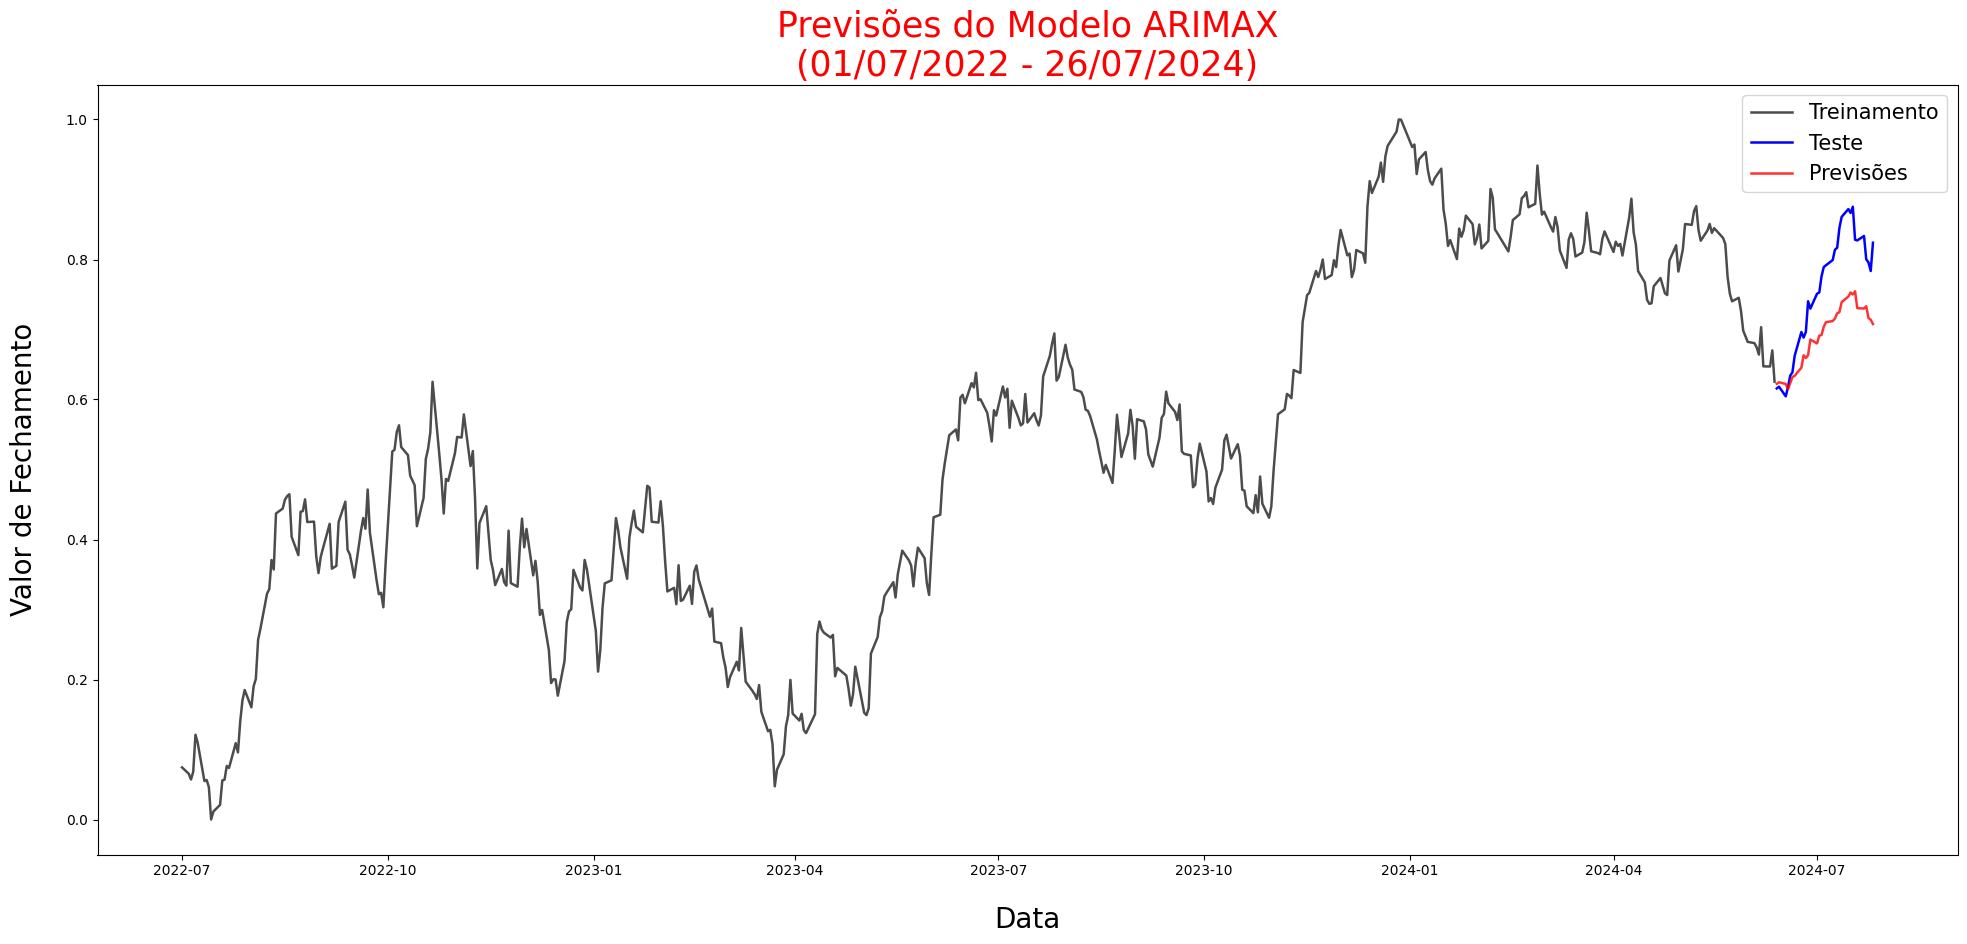

MAE: 0.08554076828689355
MSE: 0.006182882025607238
R2: 12.59%


In [702]:
#Plotando resultados
plt.figure(figsize=(24, 10))
plt.plot(s_train_sa.index, s_train_sa['FECHAMENTO'], label='Treinamento', color = 'black', linewidth = 1.8, alpha=0.7)
plt.plot(s_test_sa.index, s_test_sa['FECHAMENTO'], label='Teste', color='blue', linewidth = 1.8, alpha=1 )
plt.plot(s_test_sa.index, previsoes_sa, label='Previsões', color='red', linewidth = 1.8, alpha=0.8)
plt.xlabel('Data', fontsize=20, labelpad=20)
plt.ylabel('Valor de Fechamento', fontsize=20, labelpad=20)
plt.title('Previsões do Modelo ARIMAX\n(01/07/2022 - 26/07/2024)', color='red', fontsize=25)
plt.legend(loc='upper right', fontsize=15)
plt.show()

#Exibindo resultados
print(f'MAE: {mae_sa}')
print(f'MSE: {mse_sa}')
print(f'R2: {r2_sa:.2%}')

###<font color='red'>**CONCLUSÃO DO MODELO**</font>

>O modelo **ARIMAX** foi empregado para prever os valores de fechamento das ações da Ibovespa, utilizando o valor de ABERTURA como variável exógena. No entanto, os resultados obtidos com esse modelo não foram satisfatórios:

- **Mean Absolute Error (MAE)**: 0.0855

- **Mean Squared Error (MSE)**: 0.0062

- **R²**: 12.59%

>O baixo valor de **R²** indica que o modelo **ARIMAX** não conseguiu capturar adequadamente a volatilidade e os padrões nos dados, resultando em previsões pouco precisas. A elevada diferença entre os valores reais e previstos, evidenciada pelos valores de **MAE** e **MSE**, sugere que este modelo não é ideal para esta série temporal.

##<font color='green'>**MODELO ESCOLHIDO:** PROPHET COM REGRESSORAS</font>


###<font color='red'>**BIBLIOTECAS**</font>

In [703]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

###<font color='red'>**SELECIONANDO O DATAFRAME**</font>

In [704]:
df_st_ph = df_ibovespa.copy()
df_st_ph= df_ibovespa.drop(['VOLUME_NEGOCIACOES', 'VARIACAO_PERCENTUAL', 'MAXIMA', 'MINIMA'], axis=1)
df_st_ph.sort_index(ascending = False, inplace=True)
df_st_ph.head()

,DATA,FECHAMENTO,ABERTURA
517,2022-07-01,98954,98542
516,2022-07-04,98609,98952
515,2022-07-05,98295,98608
514,2022-07-06,98719,98294
513,2022-07-07,100730,98722


###<font color='red'>**SEPARARNDO DADOS DE TREINO E TESTE**</font>

In [705]:
#Dividir a quantidade de corte de teste e treino
len_train_ph = int(len(df_st_ph)*0.94)

#Dividir os dados em treino e teste(94% treino, 6% teste)
df_train_ph = df_st_ph[:len_train_ph]
df_test_ph = df_st_ph[len_train_ph:]

print(f'Tamanho do conjunto de treinamento: {len(df_train_ph)}')
print(f'Tamanho do conjunto de teste: {len(df_test_ph)}')

Tamanho do conjunto de treinamento: 486
Tamanho do conjunto de teste: 32


In [706]:
#Exibir os primeiros registros dos conjuntos de base, treino e teste não escalonados
print('Dataframe base:')
display(df_st_ph.head())
display(df_st_ph.tail())

print('Conjunto de treinamento:')
display(df_train_ph.head())
display(df_train_ph.tail())

print("Conjunto de teste:")
display(df_test_ph.head())
display(df_test_ph.tail())

Dataframe base:


,DATA,FECHAMENTO,ABERTURA
517,2022-07-01,98954,98542
516,2022-07-04,98609,98952
515,2022-07-05,98295,98608
514,2022-07-06,98719,98294
513,2022-07-07,100730,98722


,DATA,FECHAMENTO,ABERTURA
4,2024-07-22,127860,127616
3,2024-07-23,126590,127860
2,2024-07-24,126423,126596
1,2024-07-25,125954,126423
0,2024-07-26,127492,125964


Conjunto de treinamento:


,DATA,FECHAMENTO,ABERTURA
517,2022-07-01,98954,98542
516,2022-07-04,98609,98952
515,2022-07-05,98295,98608
514,2022-07-06,98719,98294
513,2022-07-07,100730,98722


,DATA,FECHAMENTO,ABERTURA
36,2024-06-06,122899,121408
35,2024-06-07,120767,122899
34,2024-06-10,120760,120769
33,2024-06-11,121635,120760
32,2024-06-12,119936,121644


Conjunto de teste:


,DATA,FECHAMENTO,ABERTURA
31,2024-06-13,119568,119936
30,2024-06-14,119662,119558
29,2024-06-17,119138,119663
28,2024-06-18,119630,119138
27,2024-06-19,120261,119630


,DATA,FECHAMENTO,ABERTURA
4,2024-07-22,127860,127616
3,2024-07-23,126590,127860
2,2024-07-24,126423,126596
1,2024-07-25,125954,126423
0,2024-07-26,127492,125964


### <font color='red'>**MinMaxScaler - NORMALIZANDO OS DADOS**</font>
>Dados de treino e teste escalonados separadamente

In [707]:
#Selecionando as colunas que serão escalonadas
df_st_ph_escalonado = df_st_ph.select_dtypes(include=['int64', 'float64']).columns

In [708]:
# Inicializar o MinMaxScaler
# Normalizar os dados(Deixar todos na mesma escala)
#Selecionando biblioteca
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Ajustar o scaler nos dados de treino
scaler.fit(df_train_ph[df_st_ph_escalonado])

# Transformar os dados de treino
df_train_ph[df_st_ph_escalonado] = scaler.transform(df_train_ph[df_st_ph_escalonado])

# Transformar os dados de teste
df_test_ph[df_st_ph_escalonado] = scaler.transform(df_test_ph[df_st_ph_escalonado])

#Transformar os dados do dataframe para usar nas regressoras
df_st_ph[df_st_ph_escalonado] = scaler.transform(df_st_ph[df_st_ph_escalonado])

<ipython-input-708-5e65c8908827>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_ph[df_st_ph_escalonado] = scaler.transform(df_train_ph[df_st_ph_escalonado])
<ipython-input-708-5e65c8908827>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_ph[df_st_ph_escalonado] = scaler.transform(df_test_ph[df_st_ph_escalonado])


In [709]:
#Exibir os primeiros registros dos conjuntos de base, treino e teste escalonados
print('Dataframe base:')
display(df_st_ph.head())
display(df_st_ph.tail())

print('Conjunto de treinamento:')
display(df_train_ph.head())
display(df_train_ph.tail())

print("Conjunto de teste:")
display(df_test_ph.head())
display(df_test_ph.tail())

Dataframe base:


,DATA,FECHAMENTO,ABERTURA
517,2022-07-01,0.074410,0.063638
516,2022-07-04,0.065348,0.074406
515,2022-07-05,0.057101,0.065371
514,2022-07-06,0.068237,0.057124
513,2022-07-07,0.121057,0.068365


,DATA,FECHAMENTO,ABERTURA
4,2024-07-22,0.833635,0.827236
3,2024-07-23,0.800278,0.833644
2,2024-07-24,0.795892,0.800446
1,2024-07-25,0.783574,0.795903
0,2024-07-26,0.823970,0.783848


Conjunto de treinamento:


,DATA,FECHAMENTO,ABERTURA
517,2022-07-01,0.074410,0.063638
516,2022-07-04,0.065348,0.074406
515,2022-07-05,0.057101,0.065371
514,2022-07-06,0.068237,0.057124
513,2022-07-07,0.121057,0.068365


,DATA,FECHAMENTO,ABERTURA
36,2024-06-06,0.703333,0.664189
35,2024-06-07,0.647335,0.703349
34,2024-06-10,0.647152,0.647406
33,2024-06-11,0.670134,0.647170
32,2024-06-12,0.625509,0.670387


Conjunto de teste:


,DATA,FECHAMENTO,ABERTURA
31,2024-06-13,0.615843,0.625529
30,2024-06-14,0.618312,0.615601
29,2024-06-17,0.604549,0.618359
28,2024-06-18,0.617472,0.604570
27,2024-06-19,0.634045,0.617492


,DATA,FECHAMENTO,ABERTURA
4,2024-07-22,0.833635,0.827236
3,2024-07-23,0.800278,0.833644
2,2024-07-24,0.795892,0.800446
1,2024-07-25,0.783574,0.795903
0,2024-07-26,0.823970,0.783848


###<font color='red'>**RENOMEANDO AS COLUNAS**</font>

In [710]:
df_train_ph = df_train_ph[['DATA', 'FECHAMENTO', 'ABERTURA']].rename(columns={'DATA': 'ds', 'FECHAMENTO': 'y', 'ABERTURA': 'ABERTURA'})
df_test_ph = df_test_ph[['DATA', 'FECHAMENTO', 'ABERTURA']].rename(columns={'DATA': 'ds', 'FECHAMENTO': 'y', 'ABERTURA': 'ABERTURA'})

In [711]:
print('Conjunto de treinamento:')
display(df_train_ph.head())
display(df_train_ph.tail())

print("Conjunto de teste:")
display(df_test_ph.head())
display(df_test_ph.tail())

Conjunto de treinamento:


,ds,y,ABERTURA
517,2022-07-01,0.074410,0.063638
516,2022-07-04,0.065348,0.074406
515,2022-07-05,0.057101,0.065371
514,2022-07-06,0.068237,0.057124
513,2022-07-07,0.121057,0.068365


,ds,y,ABERTURA
36,2024-06-06,0.703333,0.664189
35,2024-06-07,0.647335,0.703349
34,2024-06-10,0.647152,0.647406
33,2024-06-11,0.670134,0.647170
32,2024-06-12,0.625509,0.670387


Conjunto de teste:


,ds,y,ABERTURA
31,2024-06-13,0.615843,0.625529
30,2024-06-14,0.618312,0.615601
29,2024-06-17,0.604549,0.618359
28,2024-06-18,0.617472,0.604570
27,2024-06-19,0.634045,0.617492


,ds,y,ABERTURA
4,2024-07-22,0.833635,0.827236
3,2024-07-23,0.800278,0.833644
2,2024-07-24,0.795892,0.800446
1,2024-07-25,0.783574,0.795903
0,2024-07-26,0.823970,0.783848


###<font color='red'>**SELECIONANDO E TREINANDO O MODELO**</font>

In [712]:
#Buscando o DF inteiro
display(df_st_ph.head())
display(df_st_ph.shape)

,DATA,FECHAMENTO,ABERTURA
517,2022-07-01,0.074410,0.063638
516,2022-07-04,0.065348,0.074406
515,2022-07-05,0.057101,0.065371
514,2022-07-06,0.068237,0.057124
513,2022-07-07,0.121057,0.068365


(518, 3)

In [713]:
#Renomeando colunas
df_st_ph = df_st_ph[['DATA', 'FECHAMENTO', 'ABERTURA']].rename(columns={'DATA': 'ds', 'FECHAMENTO': 'y', 'ABERTURA': 'ABERTURA'})

In [714]:
# Instanciar o modelo Prophet e adicionar as regressoras
prophet = Prophet()

#Adicionando as regressoras
prophet.add_regressor('ABERTURA')

#Treinando o modelo
prophet.fit(df_train_ph[['ds', 'y', 'ABERTURA']])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3eylh9xz/hzqown61.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3eylh9xz/cf0c1g_w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1246', 'data', 'file=/tmp/tmp3eylh9xz/hzqown61.json', 'init=/tmp/tmp3eylh9xz/cf0c1g_w.json', 'output', 'file=/tmp/tmp3eylh9xz/prophet_modelggkzgsa3/prophet_model-20240728165316.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:53:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:53:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


###<font color='red'>**PREVISÕES**</font>

In [715]:
#Chamando o método que cria um novo dataframe contendo datas além do conjunto de treinamento, gerando previsões futuras.
#Periods(len()), especifica o número de novos períodos com base no tamanho dos dados de teste,gera para previsões o mesmo numero usado em teste
#freq = B, Business day, ou seja, dia útil, desconsidera feriados e finais de semana.
future = prophet.make_future_dataframe(periods=len(df_test_ph), freq='B')

#Adicionar as colunas de regressoras ao DataFrame futuro
future = future.merge(df_st_ph[['ds', 'ABERTURA']], on='ds', how='left')

#Tratando os valores ausentes
#Preenchendo valores ausentes com o último valor conhecido
future['ABERTURA'].fillna(method='ffill', inplace=True)

#Verificando se há ainda valores ausentes e tratando-os
#Opcionalmente, preencha quaisquer valores restantes com 0
future.fillna(0, inplace=True)
future.head()

,ds,ABERTURA
0,2022-07-01,0.063638
1,2022-07-04,0.074406
2,2022-07-05,0.065371
3,2022-07-06,0.057124
4,2022-07-07,0.068365


In [716]:
#Identificando quantidade de valores vazios por coluna
future.isnull().sum()

ds          0
ABERTURA    0
dtype: int64

In [717]:
#Fazer previsões com o modelo treinado
forecast = prophet.predict(future)

In [718]:
#Filtrar previsões para o período de teste
forecast_test = forecast[forecast['ds'].isin(df_test_ph['ds'])]

In [719]:
#Certifique-se de que as previsões e os valores reais estão alinhados
df_test_ph = df_test_ph[df_test_ph['ds'].isin(forecast_test['ds'])]

In [720]:
# Extraia as previsões e os valores reais
y_true = df_test_ph['y'].values
y_pred = forecast_test['yhat'].values

In [721]:
assert len(y_true) == len(y_pred), "Os tamanhos de y_true e y_pred não são iguais!"

###<font color='red'>**AVALIANDO O MODELO E EXIBINDO RESULTADOS**</font>

In [722]:
#Impostando bibliotecas de medição
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [723]:
#Calculando métricas de erro
mae_ph = mean_absolute_error(y_true, y_pred)
mse_ph = mean_squared_error(y_true, y_pred)
r2_ph = r2_score(y_true, y_pred)

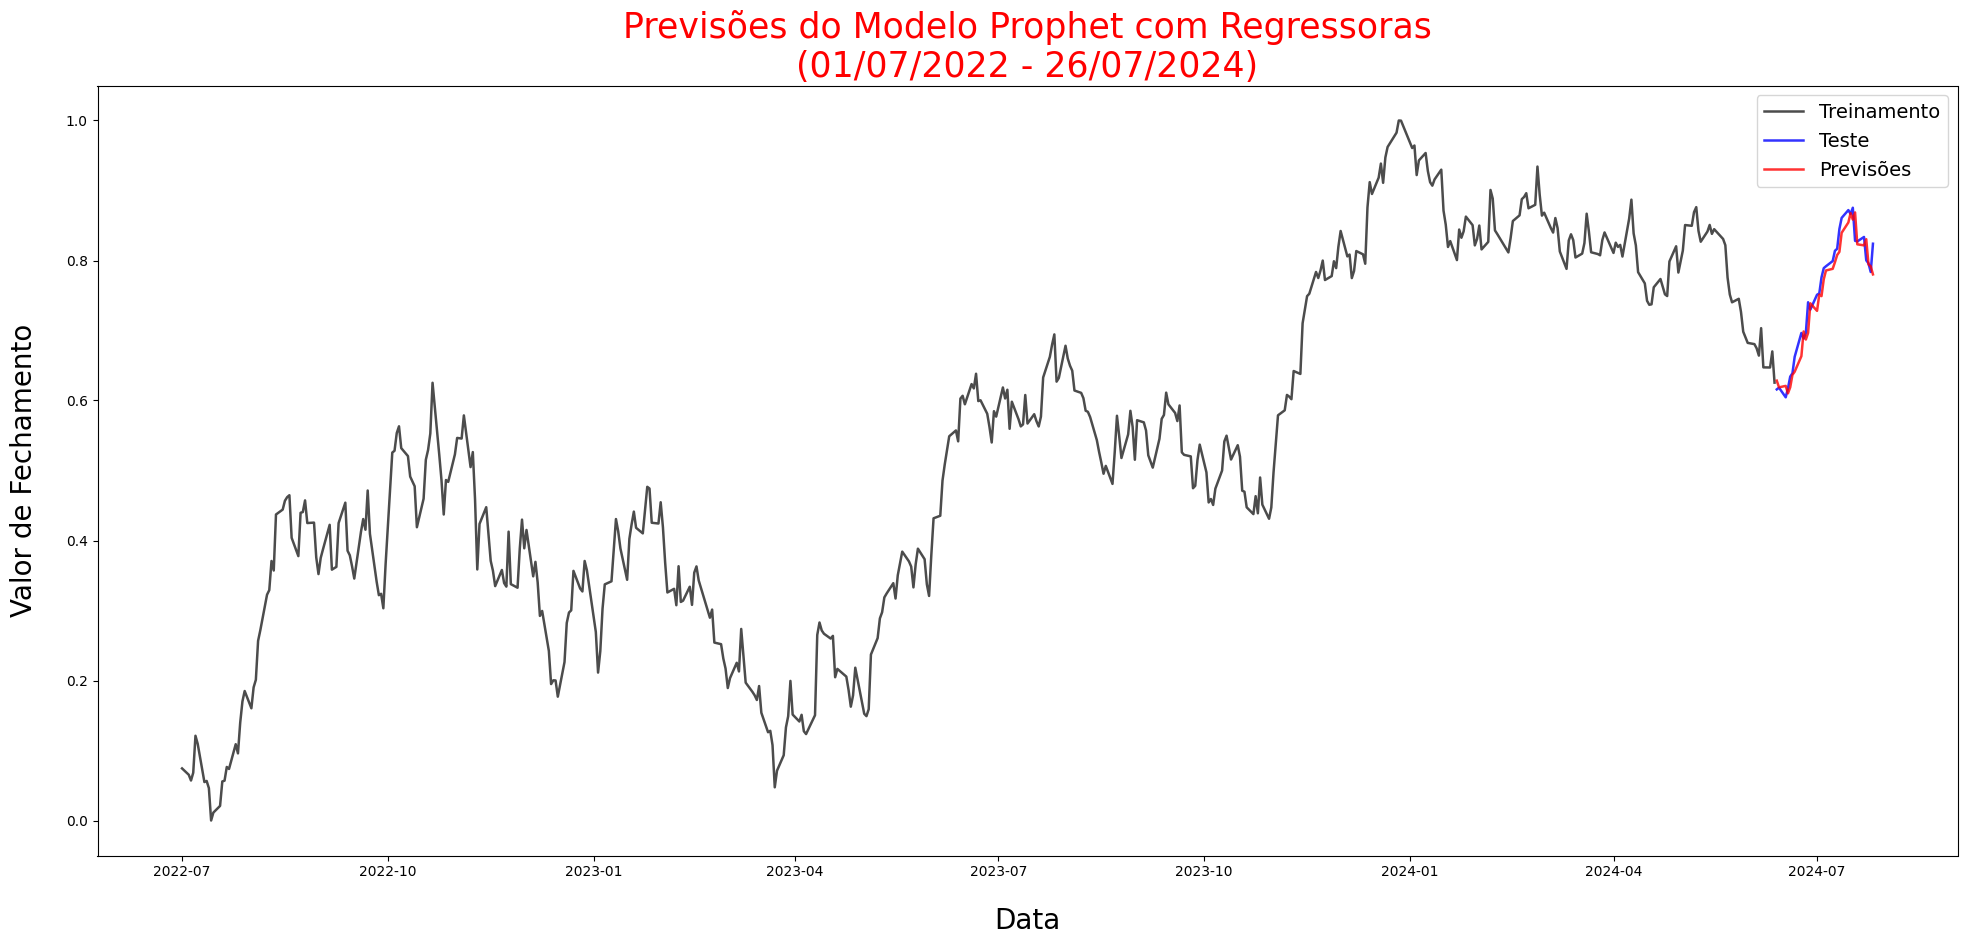

Mean Absolute Error(MAE): 0.01628018673212977
Mean Squared Error(MSE): 0.0004153783843310813
R²: 94.13%


In [724]:
#Plotando resultados
plt.figure(figsize=(24 ,10))
#Plotando linha de treinamento
plt.plot(df_train_ph['ds'], df_train_ph['y'], label='Treinamento', color = 'black', linewidth = 1.8, alpha=0.7)
#Plotando linha de teste
plt.plot(df_test_ph['ds'], df_test_ph['y'], label='Teste', color='blue', linewidth = 1.8, alpha=0.8 )
#Plotando linha de previsões
plt.plot(df_test_ph['ds'], y_pred, label='Previsões', color='red', linewidth = 1.8, alpha=0.8)
plt.xlabel('Data', fontsize=20, labelpad=20)
plt.ylabel('Valor de Fechamento', fontsize=20, labelpad=20)
plt.title('Previsões do Modelo Prophet com Regressoras\n(01/07/2022 - 26/07/2024)', color='red', fontsize=25)
plt.legend(loc='upper right', fontsize=14)
plt.show()

#Exibindo resultados
print(f'Mean Absolute Error(MAE): {mae_ph}')
print(f'Mean Squared Error(MSE): {mse_ph}')
print(f'R²: {r2_ph:.2%}')

###<font color='red'>**CONCLUSÃO DO MODELO**</font>

>O modelo **Prophet**, com a inclusão da variável de ABERTURA como regressora, apresentou um desempenho significativamente melhor:

- **Mean Absolute Error (MAE)**: 0.0163
- **Mean Squared Error (MSE)**: 0.0004
- **R²**: 94.13%

>Os resultados mostram que o **Prophet** conseguiu capturar de maneira eficaz os padrões e a volatilidade dos dados, resultando em previsões bastante precisas. O alto valor de **R²** indica que a maior parte da variabilidade nos dados de fechamento foi explicada pelo modelo.

#<font color='blue'>**CONCLUSÃO FINAL**</font>

Com base na comparação entre os modelos, fica evidente que o modelo **Prophet** com regressora é a melhor escolha para prever os valores de fechamento das ações da Ibovespa neste contexto. O desempenho superior em termos de **MAE**, **MSE** e **R²** demonstra que o Prophet é mais adequado para capturar a complexidade e volatilidade dos dados, resultando em previsões mais precisas e confiáveis. Portanto, a escolha pelo modelo **Prophet** com a inclusão de variáveis exógenas se justifica pelos resultados obtidos, oferecendo uma ferramenta robusta e eficaz para a previsão de séries temporais neste cenário específico.